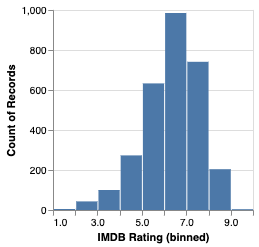

In [2]:
import { display, $display } from "https://deno.land/x/display@v1.0.1/mod.ts";

import vl from 'npm:vega-lite-api';

const mark = vl.markBar().data("https://raw.githubusercontent.com/vega/vega/main/docs/data/movies.json").encode(
  vl.x().fieldQ('IMDB Rating').bin(true),
  vl.y().count()
)

await display(mark)

In [3]:
await display({"application/json": mark.toSpec()}, {raw: true})

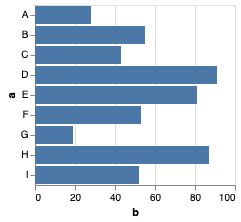

In [5]:
import { display } from "https://deno.land/x/display@v1.0.1/mod.ts";

import vl from 'npm:vega-lite-api';

await display(
    vl.markBar({ tooltip: true })
        .data([
          { a: "A", b: 28 }, { a: "B", b: 55 }, { a: "C", b: 43 },
          { a: "D", b: 91 }, { a: "E", b: 81 }, { a: "F", b: 53 },
          { a: "G", b: 19 }, { a: "H", b: 87 }, { a: "I", b: 52 },
        ])
        .encode(
          vl.x().fieldQ("b"),
          vl.y().fieldN("a"),
          vl.tooltip([vl.fieldQ("b"), vl.fieldN("a")])
        )
)

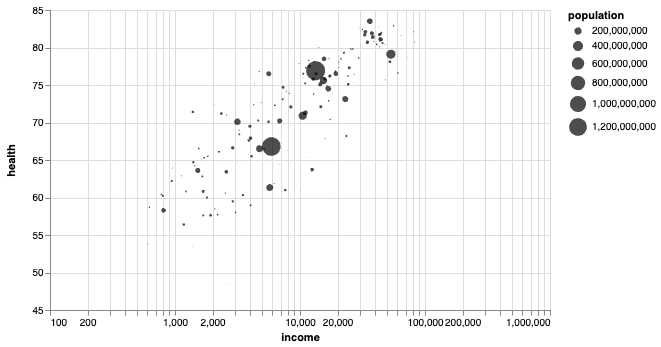

In [7]:
import { display, $display } from "https://deno.land/x/display@v1.0.1/mod.ts";

var spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/).",
  "width": 500,"height": 300,
  "data": {
    "url": "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv"
  },
  "params": [{
    "name": "view",
    "select": "interval",
    "bind": "scales"
  }],
  "mark": "circle",
  "encoding": {
    "y": {
      "field": "health",
      "type": "quantitative",
      "scale": {"zero": false},
      "axis": {"minExtent": 30}
    },
    "x": {
      "field": "income",
      "scale": {"type": "log"}
    },
    "size": {"field": "population", "type": "quantitative"},
    "color": {"value": "#000"}
  }
}

await display({ "application/vnd.vegalite.v5+json": spec}, {raw: true})

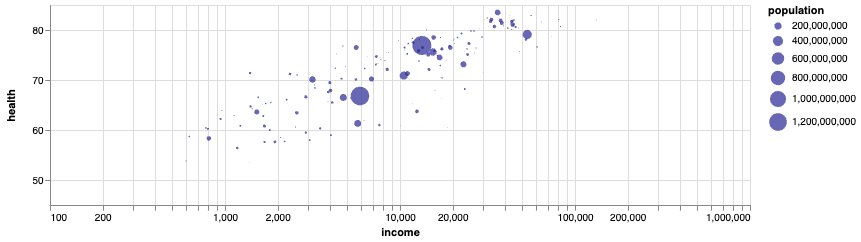

In [9]:
import vl from "npm:vega-lite-api";
import { display } from "https://deno.land/x/display@v1.0.1/mod.ts"

const plot = vl
  .markCircle()
  .params(vl.selectInterval().bind("scales"))
  .width(700)
  .data(
    "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv",
  )
  .encode(
    vl.x().field("income").scale({ type: "log" }),
    vl.y().fieldQ("health").scale({ zero: false }).axis({ minExtent: 30 }),
    vl.size(vl.fieldQ("population")),
    vl.color({ value: "#262696" }),
  );

await display(plot);

<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> 

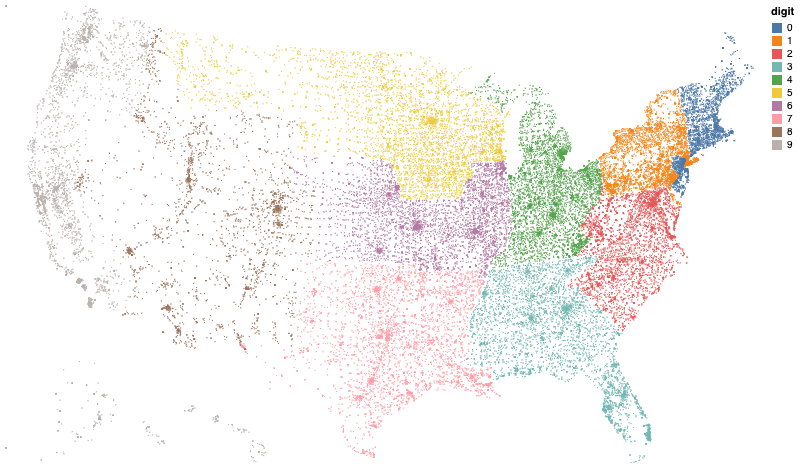

In [10]:
import { display } from "https://deno.land/x/display@v0.0.5/mod.ts";

display(vl.markSquare({size: 1, opacity: 1})
  .data('https://raw.githubusercontent.com/vega/vega-datasets/main/data/zipcodes.csv')
  .transform(vl.calculate('substring(datum.zip_code, 0, 1)').as('digit'))
  .project(vl.projection('albersUsa'))
  .encode(vl.longitude().fieldQ('longitude'), vl.latitude().fieldQ('latitude'), vl.color().fieldN('digit'))
  .width(800)
  .height(Math.floor(800 / 1.75))
  .autosize({type: 'fit-x', contains: 'padding'})
  .config({view: {stroke: null}})
)